<a href="https://colab.research.google.com/github/sushanttwayana/ML-DL-Strategies-Toolkit/blob/main/Image_classification_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Convolutional Neural Networks in PyTorch

### Part 5 of "Deep Learning with Pytorch: Zero to GANs"

This tutorial series is a hands-on beginner-friendly introduction to deep learning using [PyTorch](https://pytorch.org), an open-source neural networks library. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself. Check out the full series here:



This tutorial covers the following topics:

- Downloading an image dataset from web URL
- Understanding convolution and pooling layers
- Creating a convolutional neural network (CNN) using PyTorch
- Training a CNN from scratch and monitoring performance
- Underfitting, overfitting and how to overcome them

### How to run the code

This tutorial is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian](https://www.jovian.ai). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. [Google Colab](https://colab.research.google.com) is a free online platform for running Jupyter notebooks using Google's cloud infrastructure. You can also select "Run on Binder" or "Run on Kaggle" if you face issues running the notebook on Google Colab.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

### Using a GPU for faster training

You can use a [Graphics Processing Unit](https://en.wikipedia.org/wiki/Graphics_processing_unit) (GPU) to train your models faster if your execution platform is connected to a GPU manufactured by NVIDIA. Follow these instructions to use a GPU on the platform of your choice:

* _Google Colab_: Use the menu option "Runtime > Change Runtime Type" and select "GPU" from the "Hardware Accelerator" dropdown.
* _Kaggle_: In the "Settings" section of the sidebar, select "GPU" from the "Accelerator" dropdown. Use the button on the top-right to open the sidebar.
* _Binder_: Notebooks running on Binder cannot use a GPU, as the machines powering Binder aren't connected to any GPUs.
* _Linux_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html).
* _Windows_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html).
* _macOS_: macOS is not compatible with NVIDIA GPUs


If you do not have access to a GPU or aren't sure what it is, don't worry, you can execute all the code in this tutorial just fine without a GPU.

## Exploring the CIFAR10 Dataset

In the [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn), we trained a feedfoward neural networks with a single hidden layer to classify handwritten digits from the [MNIST dataset](http://yann.lecun.com/exdb/mnist) with over 97% accuracy. For this tutorial, we'll use the CIFAR10 dataset, which consists of 60000 32x32 px colour images in 10 classes. Here are some sample images from the dataset:

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">


In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
project_name='05-cifar10-cnn'

We'll download the images in PNG format from [this page](https://course.fast.ai/datasets), using some helper functions from the `torchvision` and `tarfile` packages.

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')


Using downloaded and verified file: ./cifar10.tgz


tgz file format represents tar gigez archive

The .tgz file format is a compressed archive format that combines files and folders into a single file with the extension ".tgz" or ".tar.gz". It is often referred to as a "tarball" because it is created using the Tar (Tape Archive) utility and compressed with gzip.

Here's a breakdown of the components:

.tar: This stands for Tape Archive. It is an uncompressed archive format that combines multiple files and directories into a single file.

.gz: This extension indicates that the file has been compressed using gzip, a file compression utility. Gzip reduces the file size without losing the original data.

When these two are combined, you get a compressed archive that retains the directory structure and files, making it easier to transfer or distribute multiple files as a single entity. To extract the contents of a .tgz file, you would typically use a tool like tar combined with gzip. The command might look like this:

In [ ]:
# Extract from archive

with tarfile.open('./cifar10.tgz', 'r:gz') as tar: # as tar obj
    tar.extractall(path = './data')

The dataset is extracted to the directory `data/cifar10`. It contains 2 folders `train` and `test`, containing the training set (50000 images) and test set (10000 images) respectively. Each of them contains 10 folders, one for each class of images. Let's verify this using `os.listdir`.

In [ ]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train']
['automobile', 'bird', 'frog', 'truck', 'deer', 'ship', 'airplane', 'horse', 'dog', 'cat']


Let's look inside a couple of folders, one from the training set and another from the test set. As an exercise, you can verify that that there are an equal number of images for each class, 5000 in the training set and 1000 in the test set.

In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['4850.png', '2390.png', '4863.png', '2949.png', '0892.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0892.png', '0145.png', '0122.png', '0863.png', '0661.png']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
# ImageFolder simply requires the path to access
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
len(dataset)

50000

Here images are read as Python Images PIL and converted into PyTorch Tensors

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape `(3, 32, 32)`.

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

0 label corresponds to airplane

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(32,32,3)`. Let's create a helper function to display an image and its label.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

As matplotlib expects the channels (3) to be the final dimension.
So, Permute function takes the channel and switch the dimensions around.
Oth dimension should come to last position

Let's look at a couple of images from the dataset. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye. Try changing the indices below to view different images.

Label:  airplane (0)


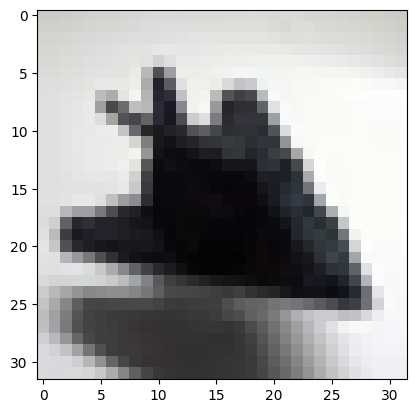

In [ ]:
img, label  = dataset[0]
show_example(img, label)

# * args python

Label:  airplane (0)


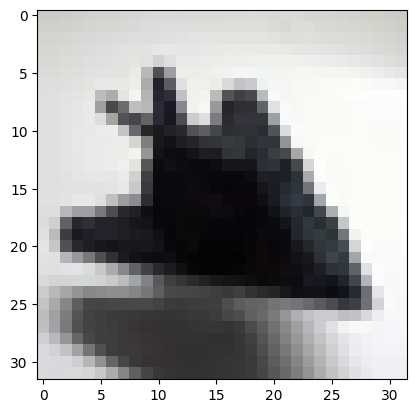

In [ ]:
# We can perform the above operations directly with *args
show_example(*dataset[0])

This represents that (img, label) arguments are passed as an idividual arguments with *agrs

Label:  airplane (0)


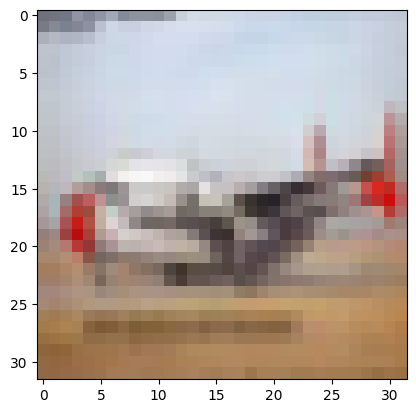

In [ ]:
show_example(*dataset[1099])

Label:  airplane (0)


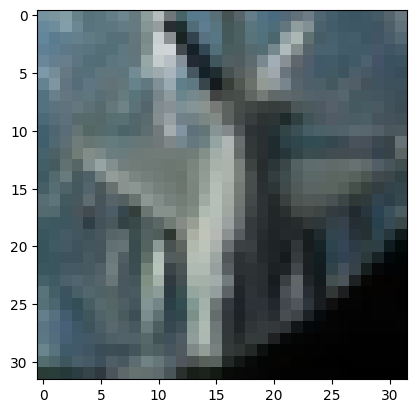

In [ ]:
show_example(*dataset[4444])

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.(23th min)
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (5000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

This will helps to globalizes the validation test no matter how many times we restart the test or turn on after turned off.(eutai validation set chai initialize hoss bhanera random seed intitalize gareko so randomly yehi use garera genereate hoss

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

The `jovian` library also provides a simple API for recording important parameters related to the dataset, model training, results etc. for easy reference and comparison between multiple experiments. Let's record `dataset_url`, `val_pct` and `rand_seed` using `jovian.log_dataset`.

In [ ]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

We can now create data loaders for training and validation, to load the data in batches

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=128


 Increase the batch_size with double size until the training time decreases and once the training time decreases the we can simply use the lesser batch_size

In [ ]:
train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)
val_dl = DataLoader(val_ds,
                    batch_size*2,
                    num_workers=4,
                    pin_memory=True)

For validation dataset we are doubling the batch_size becoz for validation we are not going to compute the gradients decent so it will use half the memory which can be provided to larger batch_size for faster training.

# num_workers
Increases CPU efficiency with parallelism

# pin_memory
For each batch it keeps the block of memory allocated for those all dataset images having the same size

We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:

        #creates a Matplotlib figure and axes. The figure size is set to (12, 6) inches.
        fig, ax = plt.subplots(figsize=(12, 6))
        # removes the ticks (axis labels) from both the x-axis and y-axis.
        ax.set_xticks([]); ax.set_yticks([])

        #Permutes the dimensions of the tensor representing the grid to change the order of dimensions
        #This is often necessary when dealing with image data.
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch_with_labels(dl, class_labels):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])

        # Display images with labels
        img_grid = make_grid(images, nrow=16).permute(1, 2, 0)
        ax.imshow(img_grid)

        # Display labels below each image
        for i in range(len(labels)):

            if i == 0:
                label = class_labels[labels[i].item()]  # Assuming class_labels is a list of class names
                col = i % 16
                row = int(i / 16)
                ax.text(col, row + 1.02, label, color='red', fontsize=12, ha='center')

        break  # Display only the first batch


 uses the PyTorch library's torchvision module to display a batch of images in a grid. It seems to be designed for visualizing batches of images in a data loader.

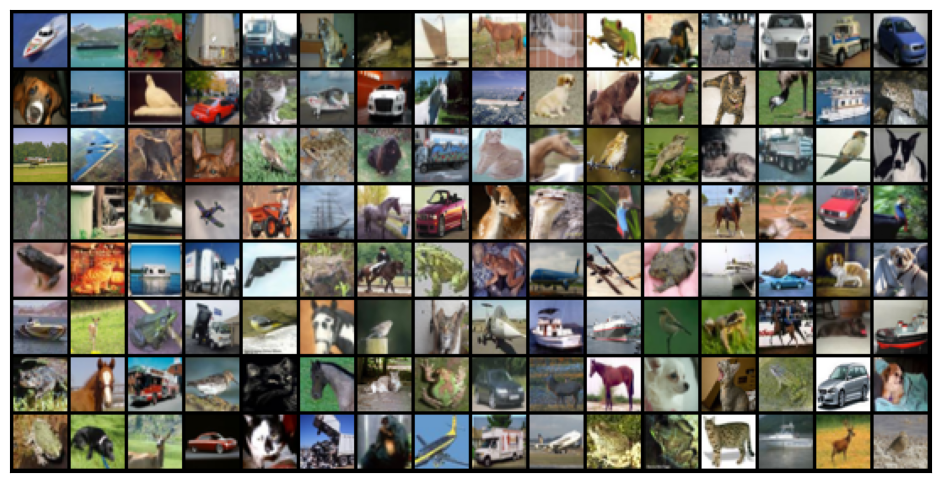

In [ ]:
show_batch(train_dl)

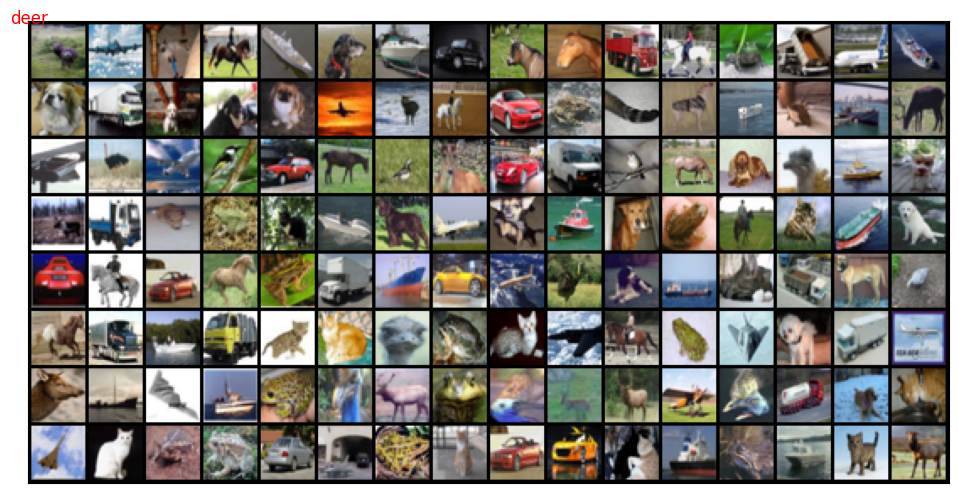

In [ ]:
show_batch_with_labels(train_dl, classes)

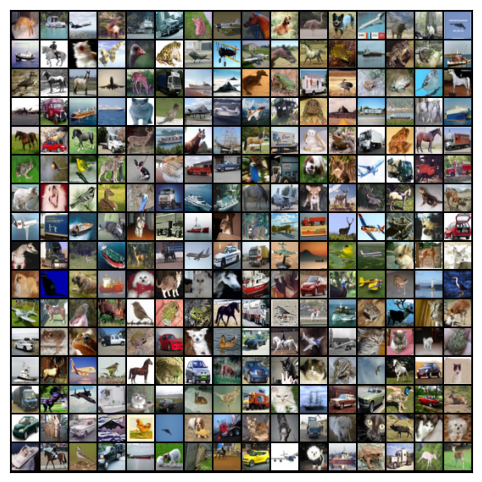

In [ ]:
show_batch(val_dl)

Once again, let's save and commit our work using `jovian` before proceeding further.

## Defining the Model (Convolutional Neural Network)


In our [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn), we defined a deep neural network with fully-connected layers using `nn.Linear`. For this tutorial however, we will use a convolutional neural network, using the `nn.Conv2d` class from PyTorch.

In nn.linear, we take the image and then we flaten out into the vectors, and we multiply each pixels with particular weights and we add up all the products ;that gives us one element in ouput vector and in another set of elements it gives another element in ouput vector and so on.
For eg: If we are taking an image with 784 px with (28*28) and we want to get 10 O/P out of each image , we are going to use one set of weights to get the 1st O/P , another set weights to get another O/P and so on.
The difficulty with this is:
*  It doesn't captures the spatial relationships. i.e Doesnt takes into account the certain patterns of the object that exists in the image. Foreg: The wing of the aeroplane can be in top right corner in one image and in another one it may be at the bottom. These two position exhibits different pixels coordinates and weights & there is no shared knowledge about these pixels. So for each set of pixels we need repetitive set of weights which captures the same relationships if the objects can move within the image. This property is called saptial invariance.

* They also don't capture local relationships. For an instance if we have an image of a dog we will try to recognize/ capture the patterns of the ears, eyes, hair and others for the recognition of the object inside the image . These local patterns are the key elements
But once we flatten the image into the vectors, and then we apply weights to each pixels and add up everything so we aren't giving lot of importances to the local relationships or pixels nearby. There won't be any special relationships between the image pixels all pixels value will be represented similarly so not special pattern can also be generated


> In Convolutuonal operation we donot apply an individual weights to different pixels rather we use smthg called kernel(3/3 window that slides around the image along with weights.
In this 3*3 matrix there exists some weights(9 weights) and we take the matrix and place it on the top left of the img and we multiply the weight of the matrix with the specific pixels of the image and we take the element wise product that we get and add up the numbers which will give us corresponding O/p matrix number 12 and we slide the kernel and get corresponfing o/p and for all valid position we do the same.
The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. - [Source](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

<img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" style="max-width:400px;">

3 * 1 + 2 * 2 + 1 * 1 + 2 * 2 = 12
These O/Ps are capturing some of the informations about the pixels of different batch.
So here image is converted into image like object. This is how works for a single channel

Let us implement a convolution operation on a 1 channel image with a 3x3 kernel.

Kernel is simply a weight matrix usually 2 dimensional or 3(multiple channels) apllied to image by sliding and now instead of having 1 weight per pixel we have fixed size of weight as per kernel . If kernel is 3*3 size it has 9 weights and across 3 channels it has 27 weights. Each of these kernels can learn a particular pattern which we can use to identify any poisiton in an image. As we may have multiple kernels which can be used to identify multiple patterns.

**Weights are the values inside the kernels which are initialized randomly**

In [ ]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    print(ri, ci)
    rk, ck = kernel.shape      # kernel dimensions
    print(rk, ck)
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    print(ro, co)
    output = torch.zeros([ro, co])
    for i in range(ro):
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [ ]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0],
    [0, 0, 1, 3, 1],
    [3, 1, 2, 2, 3],
    [2, 0, 0, 2, 2],
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2],
    [2, 2, 0],
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

5 5
3 3
3 3


tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

For multi-channel images, a different kernel is applied to each channels, and the outputs are added together pixel-wise.

For 3 channels we have 3 seperate kernels which is applied to each of the channels seperately and finnaly summed to get the O/P.

What we do here is we take this 3 channel img and change the number of channels into whatever no we want, depending on the numbers of kernel we apply we can get one output channel for each kernel. So we can take a 3 channel kernel and change it into 10 channels, 16chaneels , 32 channels and so on.

Checking out the following articles to gain a better understanding of convolutions:

1. [Intuitively understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) by Irhum Shafkat
2. [Convolutions in Depth](https://sgugger.github.io/convolution-in-depth.html) by Sylvian Gugger (this article implements convolutions from scratch)

There are certain advantages offered by convolutional layers when working with image data:

* **Fewer parameters**: A small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer.
* **Sparsity of connections**: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.
* **Parameter sharing and spatial invariance**: The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.

We will also use a [max-pooling](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) layers to progressively decrease the height & width of the output tensors from each convolutional layer.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" style="max-width:400px;">

Before we define the entire model, let's look at how a single convolutional layer followed by a max-pooling layer operates on the data.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Defining a single layer Convolution Layer

conv = nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding =1 )

This indicates 3 input channels R,G, B
8 output channels
3* 3 kernel size
applying kernel to every pixel with padding of 1.
This is done to increase the number of O/P channels so that they could learn more features.
Here while specifying the convolutinal layer we donot need to specify the size of the image, that is something that the CNN model itself works on and the kernal can be applied to any size of image so we need to specify the channels and the kernel size .

In [ ]:
# We take size of  2px horizontally and 2px vertically and pool them
pool = nn.MaxPool2d(2, 2)

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = conv(images)
    out_pool = pool(out)
    print('out.shape:', out.shape)
    print('out_pool.shape:',out_pool.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 32, 32])
out_pool.shape: torch.Size([128, 8, 16, 16])


Here after pooling we end up from 32/32 size to 16/16

In [ ]:
conv.weight.shape

torch.Size([8, 3, 3, 3])

****It has 8 kernels, each of these 8 kernels consits of 3 metrices as there are 3 input channels and inside of each metrices we have 3/3 kernel sliding over the image  ****

In [ ]:
#All kernels output channels together
conv.weight

Parameter containing:
tensor([[[[ 0.0781, -0.1201, -0.0989],
          [ 0.0508,  0.1701,  0.0643],
          [ 0.1109, -0.0033,  0.1575]],

         [[-0.1299,  0.1855,  0.0587],
          [-0.1072,  0.1864,  0.0403],
          [ 0.0994,  0.1686, -0.1169]],

         [[-0.1352,  0.1361, -0.0403],
          [-0.1402,  0.0297, -0.1356],
          [ 0.1519, -0.0803, -0.1281]]],


        [[[ 0.0853,  0.1624,  0.0438],
          [ 0.1575, -0.0313, -0.1402],
          [ 0.0774, -0.0561, -0.0485]],

         [[-0.1848,  0.0140, -0.0902],
          [-0.0311,  0.0133, -0.1269],
          [ 0.1138,  0.1813, -0.0442]],

         [[-0.1534,  0.0476, -0.0057],
          [-0.1522,  0.0428,  0.1135],
          [ 0.0449,  0.0477,  0.1006]]],


        [[[ 0.1239, -0.0219,  0.0941],
          [-0.1691,  0.1094,  0.0677],
          [-0.1759,  0.0430, -0.1489]],

         [[ 0.1766, -0.1772, -0.0293],
          [ 0.1363,  0.0023,  0.0150],
          [ 0.0071,  0.0570,  0.0741]],

         [[-0.0210,  0

In [ ]:
# lets see the 1st kernel
conv.weight[0]

tensor([[[ 0.0781, -0.1201, -0.0989],
         [ 0.0508,  0.1701,  0.0643],
         [ 0.1109, -0.0033,  0.1575]],

        [[-0.1299,  0.1855,  0.0587],
         [-0.1072,  0.1864,  0.0403],
         [ 0.0994,  0.1686, -0.1169]],

        [[-0.1352,  0.1361, -0.0403],
         [-0.1402,  0.0297, -0.1356],
         [ 0.1519, -0.0803, -0.1281]]], grad_fn=<SelectBackward0>)

In [ ]:
# Lets see one metric for red
print(conv.weight[0,0])
# Lets see one metric for blue
conv.weight[0,1]

tensor([[ 0.0781, -0.1201, -0.0989],
        [ 0.0508,  0.1701,  0.0643],
        [ 0.1109, -0.0033,  0.1575]], grad_fn=<SelectBackward0>)


tensor([[-0.1299,  0.1855,  0.0587],
        [-0.1072,  0.1864,  0.0403],
        [ 0.0994,  0.1686, -0.1169]], grad_fn=<SelectBackward0>)

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2) #no parameters
)

Refer to [Sylvian's post](https://sgugger.github.io/convolution-in-depth.html) for an explanation of `kernel_size`, `stride` and `padding`.    

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


The `Conv2d` layer transforms a 3-channel image to a 16-channel *feature map*, and the `MaxPool2d` layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.

<img src="https://i.imgur.com/KKtPOKE.png" style="max-width:540px">

Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.

This will help in further image classification problem as we donot have to define it againa and again . And with the help of the nn.Linear we can define a class containing all of these together

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


We'll use `nn.Sequential` to chain the layers and activations functions into a single network architecture.

Here we are extending the ImageClassificationBase Class to create the Cifar10CnnModel.
This is the model, a specific network structure that we are going to use specifically for the CIFAR10 Dataset.

Here while specifying the convolutinal layer we donot need to specify the size of the image, that is something that the CNN model itself works on and the kernal can be applied to any size of image so we need to specify the channels and the kernel size .

ReLU() provides the activation function ; doesn't require weights or biases.
It takes the O/P feature map we get and for each pixel value in the O/P tensor of 32x32 and for negative values converted to 0 and positive values are retained. It doesnt affect the shape of the O/p. This also introduces nonlinearity.

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # 1st block

            # input : 3 * 32 * 32)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            # output: 32 * 32 * 32

            # ReLU()-> introduces nonlinearity
            nn.ReLU(),
            # output: 32 * 32 * 32
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # output: 64 * 32 * 32
            nn.ReLU(),
            # output: 64* 32 * 32
            nn.MaxPool2d(2, 2),
            # output: 64 x 16 x 16

            # 2nd block
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            # output: 128 * 16 * 16
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            # takes the O/P feature map and flatten it out to a vector
            nn.Flatten(),
            # vector passing into a Linear layer
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            # convert 1024 into 512 O/P
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))

    def forward(self, xb):
        return self.network(xb)

Here we have 6 convolutional layers which is obtained by going deeplly inside of the starting layer so reffered as deep neural layer.

Here we are flattening the O/P feature map into a vector so as to obtain a vector of size 10 as we have 10 classes, so for each image we want to get out 10 O/P each O/P representing the probability  that the image belongs to that class.

In [ ]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probabilities for the 10 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image. Check out [Part 3 (logistic regression)](https://jovian.ml/aakashns/03-logistic-regression#C50) for a more detailed discussion on interpeting the outputs, applying softmax and identifying the predicted labels.

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0281, -0.0317,  0.0298, -0.0290,  0.0122, -0.0665,  0.0310,  0.0472,
        -0.0099, -0.0534], grad_fn=<SelectBackward0>)


To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. These are described in more detail in the [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn#C21).

In [ ]:
torch.cuda.is_available()

True

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the [previous tutorial](https://jovian.ai/aakashns/03-logistic-regression).

As we are introducing multiple layers and they work/behave differently when they are being trained and when the model is evalutaing . So in Pytorch we must specify when the model is being trained and when being evaluated so for this model.train() is used.

model.eval() ->  This tells Pytorch that these model should be kept into evaluation mode that means the layers should be frozen and there should not be any randomization. As some of the layers uses randomization in training but we avoid randomization in evaluation . No need of evalutaion of gradient decents

In [ ]:
# no gradient decent calculation required while evaluating
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 2.302781343460083, 'val_acc': 0.10006892681121826}

The initial accuracy is around 10%, which is what one might expect from a randomly intialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We'll use the following *hyperparmeters* (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time.

In [ ]:
num_epochs = 15
opt_func = torch.optim.Adam
lr = 0.0001
#(use lr of 0.001) it will give higher accuracy almost upto 79%

It's important to record the hyperparameters of every experiment you do, to replicate it later and compare it against other experiments. We can record them using `jovian.log_hyperparams`.

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.8948, val_loss: 1.6436, val_acc: 0.3890
Epoch [1], train_loss: 1.5522, val_loss: 1.4612, val_acc: 0.4623
Epoch [2], train_loss: 1.4150, val_loss: 1.3481, val_acc: 0.5087
Epoch [3], train_loss: 1.3130, val_loss: 1.2760, val_acc: 0.5413
Epoch [4], train_loss: 1.2182, val_loss: 1.2336, val_acc: 0.5591
Epoch [5], train_loss: 1.1328, val_loss: 1.1376, val_acc: 0.5962
Epoch [6], train_loss: 1.0564, val_loss: 1.0569, val_acc: 0.6276
Epoch [7], train_loss: 0.9815, val_loss: 1.0045, val_acc: 0.6477
Epoch [8], train_loss: 0.9229, val_loss: 0.9696, val_acc: 0.6557
Epoch [9], train_loss: 0.8610, val_loss: 0.9579, val_acc: 0.6642
Epoch [10], train_loss: 0.8112, val_loss: 0.8757, val_acc: 0.6989
Epoch [11], train_loss: 0.7621, val_loss: 0.8786, val_acc: 0.6966
Epoch [12], train_loss: 0.7038, val_loss: 0.8444, val_acc: 0.7185
Epoch [13], train_loss: 0.6558, val_loss: 0.8272, val_acc: 0.7100
Epoch [14], train_loss: 0.6119, val_loss: 0.8120, val_acc: 0.7271


Just as we have recorded the hyperparameters, we can also record the final metrics achieved by the model using `jovian.log_metrics` for reference, analysis and comparison.

In [ ]:
history

[{'val_loss': 1.6435539722442627,
  'val_acc': 0.3890395164489746,
  'train_loss': 1.8948262929916382},
 {'val_loss': 1.4612330198287964,
  'val_acc': 0.4623391628265381,
  'train_loss': 1.552175760269165},
 {'val_loss': 1.3480808734893799,
  'val_acc': 0.5087200999259949,
  'train_loss': 1.4150339365005493},
 {'val_loss': 1.276008129119873,
  'val_acc': 0.5413143038749695,
  'train_loss': 1.3130033016204834},
 {'val_loss': 1.2336221933364868,
  'val_acc': 0.5590647459030151,
  'train_loss': 1.2181739807128906},
 {'val_loss': 1.1375763416290283,
  'val_acc': 0.5962430834770203,
  'train_loss': 1.1328448057174683},
 {'val_loss': 1.0568883419036865,
  'val_acc': 0.6275964975357056,
  'train_loss': 1.0564326047897339},
 {'val_loss': 1.004453420639038,
  'val_acc': 0.6477137207984924,
  'train_loss': 0.9814586639404297},
 {'val_loss': 0.9695500731468201,
  'val_acc': 0.6556525826454163,
  'train_loss': 0.9228950142860413},
 {'val_loss': 0.9578565955162048,
  'val_acc': 0.664177417755127,
 

In [ ]:
print("train_loss=",history[-1]['train_loss'])
print("val_loss=",history[-1]['val_loss'])
print( "val_acc=",history[-1]['val_acc'])

train_loss= 0.6118834018707275
val_loss= 0.8120347857475281
val_acc= 0.7271254658699036


We can also plot the valdation set accuracies to study how the model improves over time.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

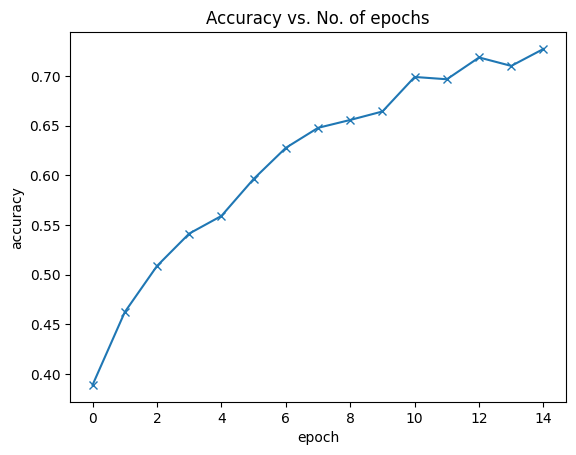

In [ ]:
plot_accuracies(history)

Our model reaches an accuracy of around 75%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 80% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

We can also plot the training and validation losses to study the trend.

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

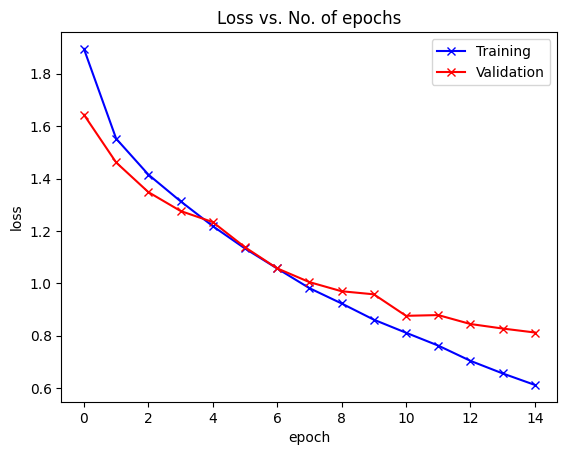

In [ ]:
plot_losses(history)

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point!

<img src="https://i.stack.imgur.com/1QU0m.png" style="max-width:400px;">

This phenomenon is called **overfitting**, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data.


Following are some common stragegies for avoiding overfitting:

- Gathering and generating more training data, or adding noise to it
- Using regularization techniques like batch normalization & dropout
- Early stopping of model's training, when validation loss starts to increase

We will cover these topics in more detail in the next tutorial in this series, and learn how we can reach an accuracy of **over 90%** by making minor but important changes to our model.

When you try different experiments (by chaging the learning rate, batch size, optimizer etc.) and record hyperparameters and metrics with each version of your notebook, you can use the [**Compare**](https://jovian.ml/aakashns/05-cifar10-cnn/compare) view on the project page to analyze which approaches are working well and which ones aren't. You sort/filter by accuracy, loss etc., add notes for each version and even invite collaborators to contribute to your project with their own experiments.

<a href="https://jovian.ml/aakashns/05-cifar10-cnn"><img src="https://i.imgur.com/p1Z3vgN.png"></a>

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by creating a test dataset using the `ImageFolder` class.



In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


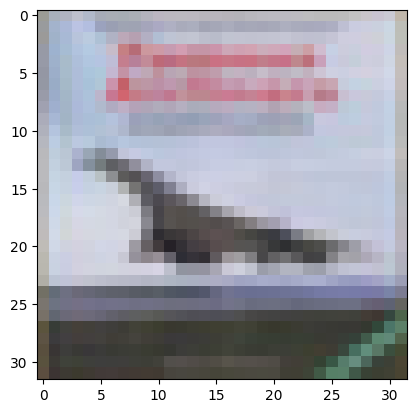

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


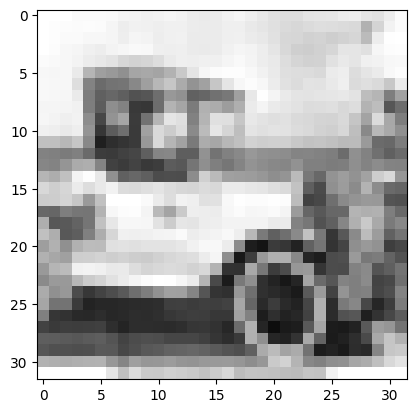

In [ ]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


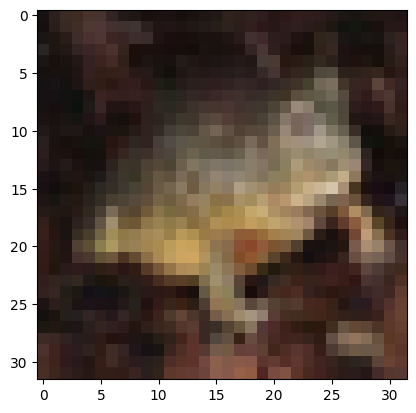

In [ ]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: deer , Predicted: dog


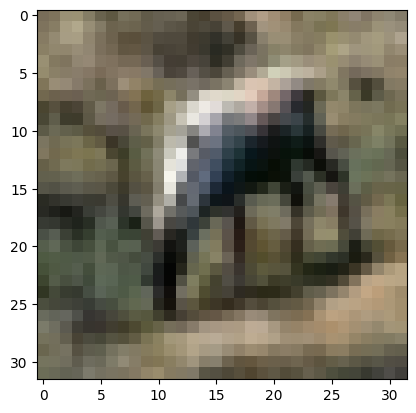

In [ ]:
img, label = test_dataset[4444]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: ship , Predicted: ship


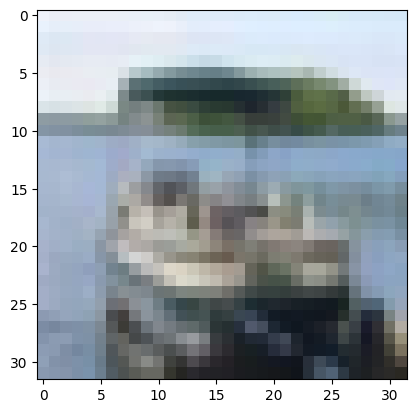

In [ ]:
img, label = test_dataset[8250]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using `jovian`. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8147549629211426, 'val_acc': 0.720898449420929}

## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the `.load_state_dict` method.

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 0.8147549629211426, 'val_acc': 0.720898449420929}

Check out the **Files** tab on the project page to view or download the trained model weights. You can also download all the files together using the *Download Zip* option in the *Clone* dropdown.

Data science work is often fragmented across many different platforms (Git for code, Dropbox/S3 for datasets & artifacts, spreadsheets for hyperparameters, metrics etc.) which can make it difficult to share and reproduce experiments. Jovian.ml solves this by capturing everyting related to a data science project on a single platform, while providing a seamless workflow for capturing, sharing and reproducting your work. To learn what you can do with Jovian.ml, check out the docs: [https://docs.jovian.ml](https://docs.jovian.ml).

## Summary and Further Reading/Exercises

We've covered a lot of ground in this tutorial. Here's quick recap of the topics:
* Introduction to the CIFAR10 dataset for image classification
* Downloading, extracing and loading an image dataset using `torchvision`
* Show random batches of images in a grid using `torchvision.utils.make_grid`
* Creating a convolutional neural network using with `nn.Conv2d` and `nn.MaxPool2d` layers
* Capturing dataset information, metrics and hyperparameters using the `jovian` library
* Training a convolutional neural network and visualizing the losses and errors
* Understanding overfitting and the strategies for avoiding it (more on this later)
* Generating predictions on single images from the test set
* Saving and loading the model weights, and attaching them to the eperiment snaptshot using `jovian`

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:
* Try chaging the hyperparameters to achieve a higher accuracy within fewer epochs. You use the comparison table on the Jovian.ml project page to compare your experiments.
* Try adding more convolutional layers, or increasing the number of channels in each convolutional layer
* Try using a feedforward neural network and see what's the maximum accuracy you can achieve
* Read about some of the startegies mentioned above for reducing overfitting and achieving better results, and try to implement them by looking into the PyTorch docs.
* Modify this notebook to train a model for a different dataset (e.g. CIFAR100 or ImageNet)

In the next tutorial, we will continue to improve our model's accuracy using techniques like data augmentation, batch normalization and dropout. We will also learn about residual networks (or ResNets), a small but critical change to the model architecture that will significantly boost the performance of our model. Stay tuned!